In [80]:
import pandas as pd
import glob

path = "./raw_data/"

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

#df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], dayfirst=True)

#df = df[df['Location of Monitoring Station'].isin(['Kathivakkam, Municipal Kalyana Mandapam, Chennai'])]
#df = df[df['Location of Monitoring Station'].isin(['Thiruvottiyur,  Chennai'])]
df = df[df['Location of Monitoring Station'].isin(['Kathivakkam, Municipal Kalyana Mandapam, Chennai', 'Govt. High School, Manali, Chennai.','Thiruvottiyur,  Chennai', 'Thiruvottiyur, Chennai'])]

In [81]:
df=df.drop(['State','City/Town/Village/Area','Agency', 'Type of Location', 'Stn Code'], axis=1)

In [82]:
df
df.to_csv('tempppp.csv')

C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_47000\1032752188.py:11: UserWarning: Parsing '13/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])
C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_47000\1032752188.py:11: UserWarning: Parsing '18/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])
C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_47000\1032752188.py:11: UserWarning: Parsing '20/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])
C:\Users\Dinesh.Sreekanthan\AppData\Local\Temp\ipykernel_47000\1032752188.py:11: UserWarning: Parsing '25/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_

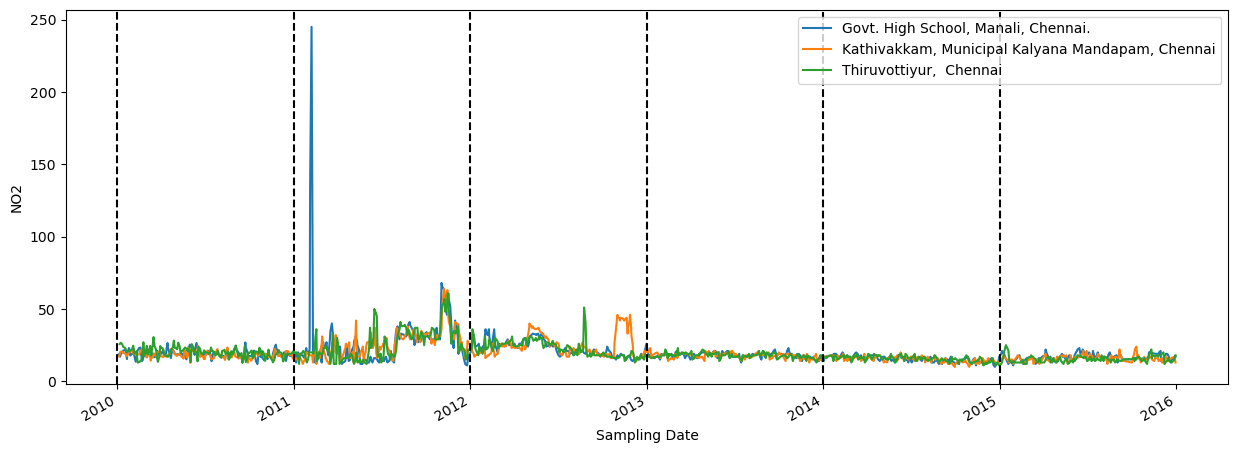

In [83]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load data from CSV file
df = pd.read_csv('tempppp.csv')

# Convert Sampling Date column to datetime object
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

# Pivot table and interpolate missing values
pivot_df = pd.pivot_table(df, values='NO2', index='Sampling Date', columns='Location of Monitoring Station')
pivot_df = pivot_df.interpolate(method='linear')

# Plot the data
pivot_df.plot()
plt.legend()
#plt.ylim(top=100)
plt.ylabel('NO2')
plt.rcParams["figure.figsize"] = (15,5.5)

# Add vertical lines for the start of each year
xcoords = [datetime(2010,1,1), datetime(2011,1,1), datetime(2012,1,1), datetime(2013,1,1), datetime(2014,1,1), datetime(2015,1,1)]
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

plt.show()


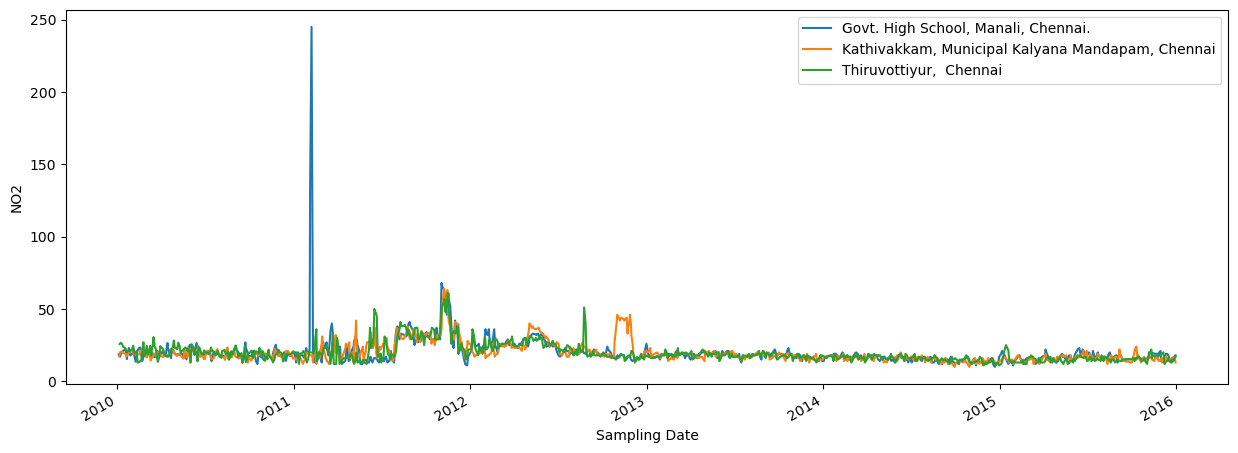

In [84]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pivot_df = pd.pivot_table(df, values='NO2', index='Sampling Date', columns='Location of Monitoring Station')
pivot_df = pivot_df.interpolate(method='linear')
pivot_df.plot() #marker='.', alpha=0.5, linestyle='None'
plt.legend()
#plt.ylim(top=100)
plt.ylabel('NO2')
plt.rcParams["figure.figsize"] = (15,5.5)
'''
xcoords = ['2010-01-01', '2011-01-01','2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
'''
plt.show()

In [85]:
print(df)

print(df.dtypes)
df['Sampling Date'] = df['Sampling Date'].astype(str)

df['Sampling Date'] = np.where(df['Sampling Date'].str.contains('/'), pd.to_datetime(df['Sampling Date']).dt.strftime('%m/%d/%Y'), pd.to_datetime(df['Sampling Date'], dayfirst=True).dt.strftime('%m/%d/%Y'))
df=df.set_index('Sampling Date')

import pandas as pd
print(df)
#df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

#df = df.sort_values(['Location of Monitoring Station', 'Sampling Date'], ascending=[True, True])

df.to_csv('data.csv')

print(df.index)



      Unnamed: 0 Sampling Date  \
0              0    2010-01-05   
1              1    2010-01-07   
2              2    2010-01-12   
3              3    2010-01-19   
4              4    2010-01-21   
...          ...           ...   
1692       10299    2015-11-12   
1693       10300    2015-12-16   
1694       10301    2015-12-18   
1695       10302    2015-12-23   
1696       10303    2015-12-30   

                        Location of Monitoring Station    SO2        NO2  \
0     Kathivakkam, Municipal Kalyana Mandapam, Chennai   9.60  17.166667   
1     Kathivakkam, Municipal Kalyana Mandapam, Chennai  11.15  20.283333   
2     Kathivakkam, Municipal Kalyana Mandapam, Chennai  12.45  20.516667   
3     Kathivakkam, Municipal Kalyana Mandapam, Chennai  10.75  18.183333   
4     Kathivakkam, Municipal Kalyana Mandapam, Chennai   9.78  17.320000   
...                                                ...    ...        ...   
1692                           Thiruvottiyur,  Chennai  13.

In [86]:
import pandas as pd

# Read CSV file
df = pd.read_csv('data.csv')

# Convert "Sampling Date" column to datetime format
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

# Sort dataframe by location and date
df = df.sort_values(['Location of Monitoring Station', 'Sampling Date'], ascending=[True, True])
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('SPM', axis=1)
df = df.drop('PM 2.5', axis=1)

# Save sorted dataframe as a CSV file
df.to_csv('sorted_data.csv', index=False)


In [87]:
df2 = df.loc[:, 'NO2'].to_frame()

print(df2)

df2['NO2'] = df2['NO2'].interpolate(option='spline')

df2.to_csv('azure_train.csv')

df2['y'] = df2['NO2'].shift(-1)
print(df2.index)

print(df2.head(20))

            NO2
100   18.666667
101   17.033333
102   20.300000
103   21.716667
104   15.366667
...         ...
1671  12.000000
1693  16.000000
1694  14.000000
1695  13.000000
1696  18.000000

[1697 rows x 1 columns]
Int64Index([ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
            ...
            1687, 1688, 1689, 1690, 1655, 1671, 1693, 1694, 1695, 1696],
           dtype='int64', length=1697)
           NO2          y
100  18.666667  17.033333
101  17.033333  20.300000
102  20.300000  21.716667
103  21.716667  15.366667
104  15.366667  23.050000
105  23.050000  17.833333
106  17.833333  18.916667
107  18.916667  22.333333
108  22.333333  13.566667
109  13.566667  19.416667
110  19.416667  23.016667
111  23.016667  23.366667
112  23.366667  14.133333
113  14.133333  18.050000
114  18.050000  17.750000
115  17.750000  22.766667
116  22.766667  19.566667
117  19.566667  16.800000
118  16.800000  19.300000
119  19.300000  16.916667


In [88]:
train = df2[:400]
test = df2[400:]
test = test.drop(test.tail(1).index) # Drop last row
print(f'Shape of training set: {train.shape}')
print(f'Shape of test set: {test.shape}')

Shape of training set: (400, 2)
Shape of test set: (1296, 2)


In [89]:
test = test.copy()

test['baseline_pred'] = test['NO2']
print(test)

test.interpolate(method='linear', inplace=True)


       NO2     y  baseline_pred
1259  17.0  17.0           17.0
1260  17.0  20.0           17.0
1261  20.0  18.0           20.0
1262  18.0  17.0           18.0
1263  17.0  18.0           17.0
...    ...   ...            ...
1655  20.0  12.0           20.0
1671  12.0  16.0           12.0
1693  16.0  14.0           16.0
1694  14.0  13.0           14.0
1695  13.0  18.0           13.0

[1296 rows x 3 columns]


In [90]:
from sklearn.tree import DecisionTreeRegressor
X_train = train['NO2'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['NO2'].values.reshape(-1,1)
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_reg.fit(X=X_train, y=y_train)
# Make predictions
dt_pred = dt_reg.predict(X_test)
# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

print(test)

       NO2     y  baseline_pred    dt_pred
1259  17.0  17.0           17.0  17.732143
1260  17.0  20.0           17.0  17.732143
1261  20.0  18.0           20.0  19.314493
1262  18.0  17.0           18.0  17.733333
1263  17.0  18.0           17.0  17.732143
...    ...   ...            ...        ...
1655  20.0  12.0           20.0  19.314493
1671  12.0  16.0           12.0  12.750000
1693  16.0  14.0           16.0  17.400000
1694  14.0  13.0           14.0  16.692308
1695  13.0  18.0           13.0  19.900000

[1296 rows x 4 columns]


In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
test['gbr_pred'] = gbr_pred
print(test)

test.to_csv('lkamsldf.csv')

       NO2     y  baseline_pred    dt_pred   gbr_pred
1259  17.0  17.0           17.0  17.732143  17.800299
1260  17.0  20.0           17.0  17.732143  17.800299
1261  20.0  18.0           20.0  19.314493  18.931044
1262  18.0  17.0           18.0  17.733333  18.019036
1263  17.0  18.0           17.0  17.732143  17.800299
...    ...   ...            ...        ...        ...
1655  20.0  12.0           20.0  19.314493  18.931044
1671  12.0  16.0           12.0  12.750000  13.158973
1693  16.0  14.0           16.0  17.400000  17.673118
1694  14.0  13.0           14.0  16.692308  17.114462
1695  13.0  18.0           13.0  19.900000  19.614477

[1296 rows x 5 columns]


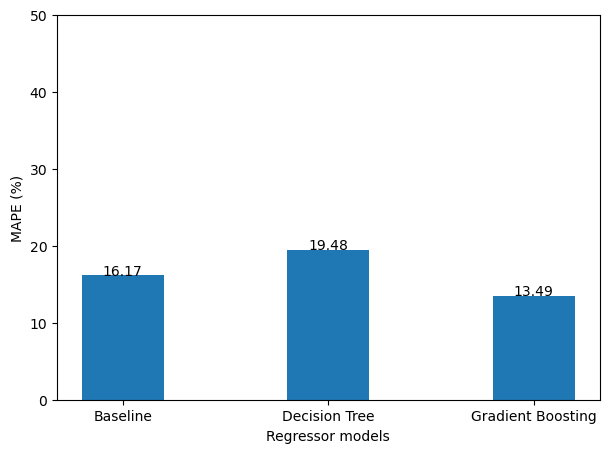

In [92]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

import numpy as np

baseline_mape = mape(test['y'], test['baseline_pred'])
dt_mape = mape(test['y'], test['dt_pred'])
gbr_mape = mape(test['NO2'], test['gbr_pred'])
# Generate bar plot
fig, ax = plt.subplots(figsize=(7, 5))
x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 50)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')
    


plt.show()